<a href="https://colab.research.google.com/github/AlpaslanErdag/Autonomous-Car-2022MLIS2/blob/main/MLiSII_AutonomousCar_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/AlpaslanErdag/cardata  # CLONING DATA FROM GITHUB

Cloning into 'cardata'...
remote: Enumerating objects: 14848, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 14848 (delta 8), reused 23 (delta 5), pack-reused 14822
Receiving objects: 100% (14848/14848), 1.64 GiB | 33.67 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (14829/14829), done.


In [3]:
!pip3 install imgaug


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam # - Works
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense,Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import glob
import random

In [5]:
from google.colab import files


In [6]:
######### PART-1 #########
##########################
datadir= 'cardata'
colums= ['image_id','angle','speed']
data=pd.read_csv(os.path.join(datadir,'training_norm3.csv'))
data.head()

image_id   angle  speed
0    1.png  0.4375      0
1    2.png  0.8125      1
2    3.png  0.4375      1
3    4.png  0.6250      1
4    5.png  0.5000      0

In [7]:
########## PART 2###########
############################
print(data.iloc[3])
def load_img_steering(datadir, df):
  image_path = []
  angle = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    image_id = indexed_data[0]
    image_path.append(os.path.join(datadir,image_id))
    angle.append(float(indexed_data[1]))
    #speed.append((indexed_data[2]))
  image_paths = np.asarray(image_path)
  angles = np.asarray(angle)
  #speeds= np.asarray(speed)
  image_ids= np.asarray(image_id)
  return image_paths, angles

image_id    4.png
angle       0.625
speed           1
Name: 3, dtype: object


In [8]:
image_paths,angles= load_img_steering(datadir + '/training_data/training_data', data)
angles

array([0.4375, 0.8125, 0.4375, ..., 0.5625, 0.625 , 0.6875])

In [9]:
X_train,X_valid,y_train,y_valid= train_test_split(image_paths,angles,test_size=0.2,random_state=3)
####################################################################################


In [10]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

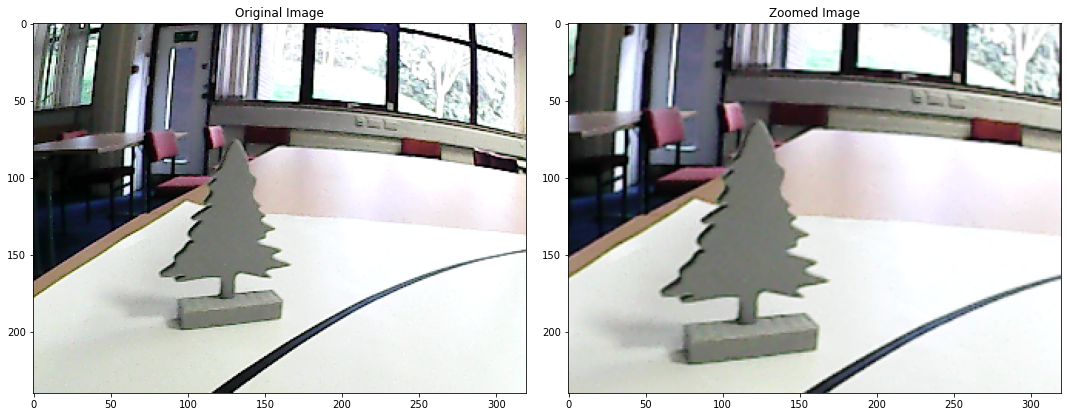

In [11]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [12]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

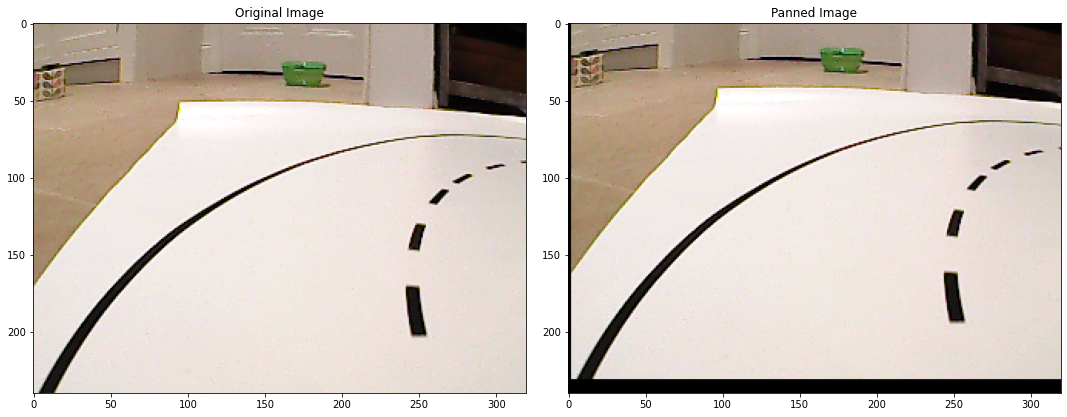

In [13]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [14]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Brightness altered image ')

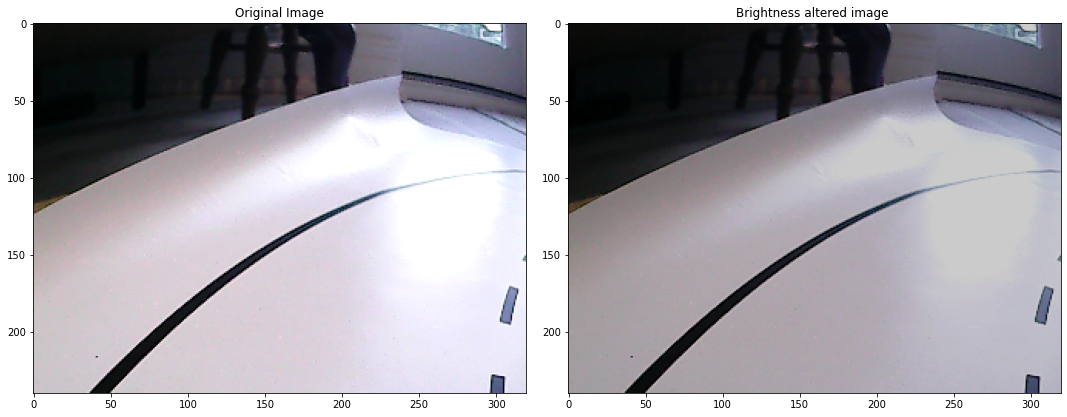

In [15]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [16]:
def img_random_flip(image, angle):
    image = cv2.flip(image,1)
    angle = 1-angle
    return image, angle

In [17]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
angle= angles[random_index]

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.25')

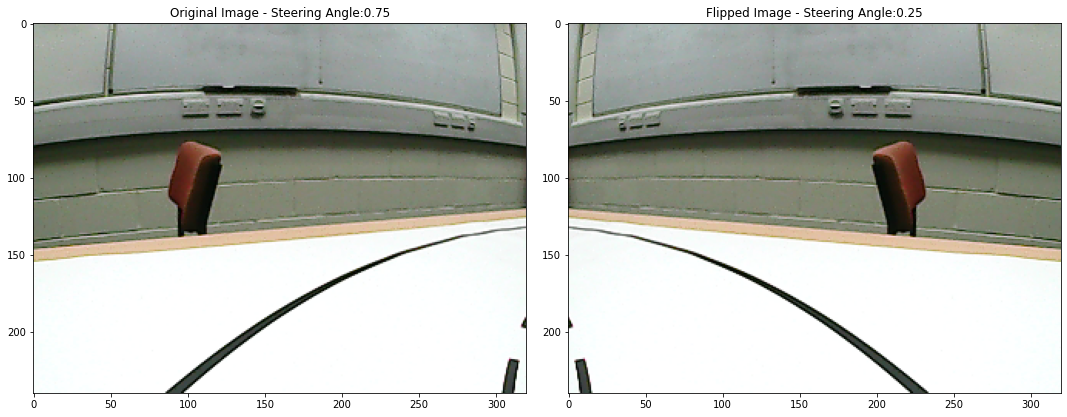

In [18]:
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [19]:
def blur(image):
    kernel_size = random.randint(1, 5)  # kernel larger than 5 would make the image way too blurry
    image = cv2.blur(image,(kernel_size, kernel_size))
   
    return image

In [20]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
angle= angles[random_index]

Text(0.5, 1.0, 'Blurred image ')

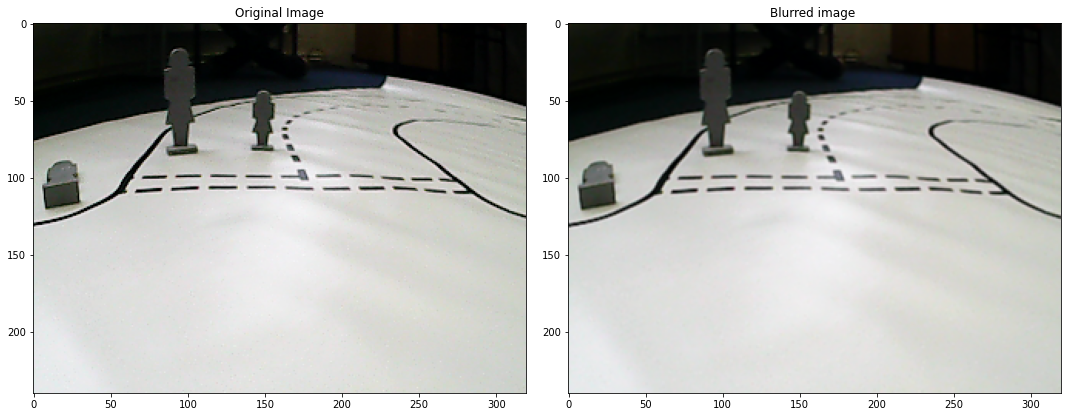

In [21]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
blurred_image = blur(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(blurred_image)
axs[1].set_title('Blurred image ')

In [22]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = blur(image)      
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


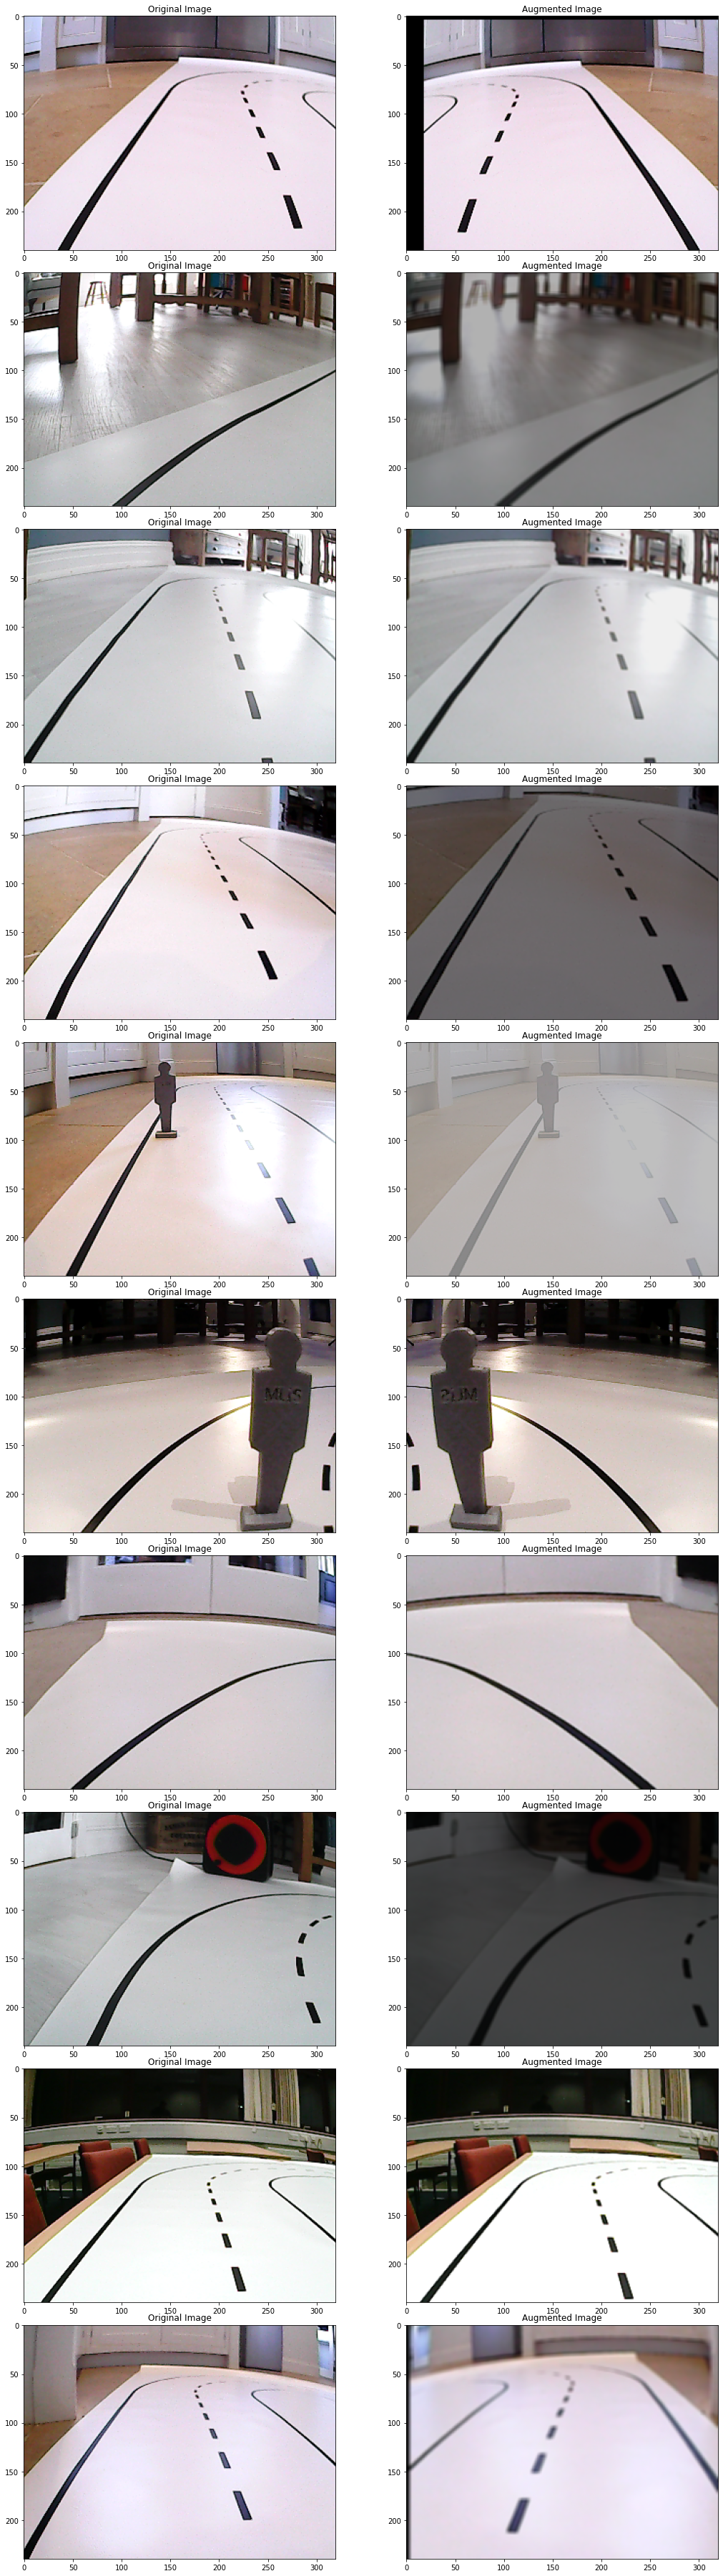

In [23]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = angles[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

Text(0.5, 1.0, 'Preprocessed Image')

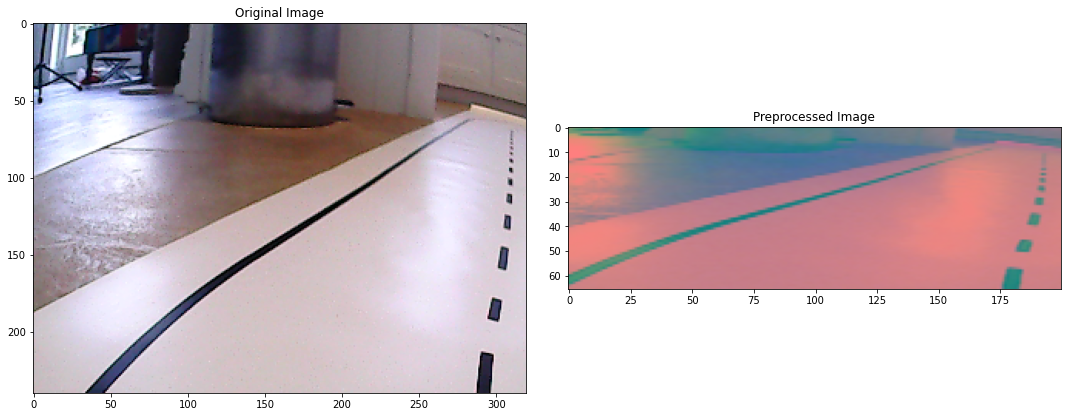

In [24]:
def img_preprocess(img):
    img = img[35:,50:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    #img = img / 255.0 
    #img = np.true_divide(image, 255, dtype=np.float32,casting="unsafe")
    return img
image = image_paths[165]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [25]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

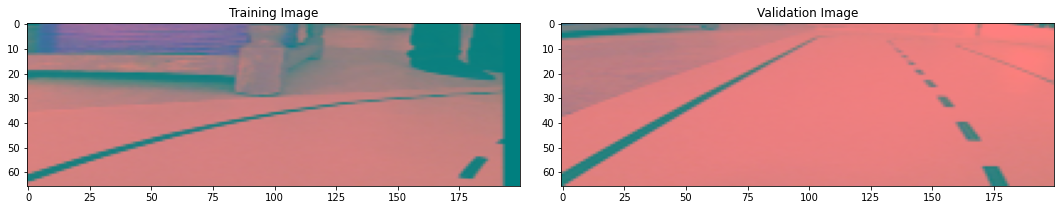

In [26]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [67]:
x_train_gen.shape

(1, 66, 200, 3)

In [27]:
def nvidia_model():
 
  model = Sequential()
 
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu')) 
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  #model.add(Dropout(0.5))
 
 
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  #model.add(Dropout(0.5))
 
 
  model.add(Dense(50, activation='elu'))
  model.add(Dense(10, activation ='elu'))
  model.add(Dense(1))
 
 
  optimizer= Adam(learning_rate=1e-4)
  model.compile(loss='mse', optimizer=optimizer)

  return model

In [28]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [56]:
X_train

array(['cardata/training_data/training_data/9137.png',
       'cardata/training_data/training_data/2796.png',
       'cardata/training_data/training_data/11415.png', ...,
       'cardata/training_data/training_data/11519.png',
       'cardata/training_data/training_data/1689.png',
       'cardata/training_data/training_data/5998.png'], dtype='<U45')

In [29]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300,
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
300/300 [==============================] - 488s 2s/step - loss: 0.0348 - val_loss: 0.0270
Epoch 2/10
300/300 [==============================] - 486s 2s/step - loss: 0.0255 - val_loss: 0.0181
Epoch 3/10
300/300 [==============================] - 483s 2s/step - loss: 0.0212 - val_loss: 0.0152
Epoch 4/10
300/300 [==============================] - 457s 2s/step - loss: 0.0163 - val_loss: 0.0131
Epoch 5/10
300/300 [==============================] - 460s 2s/step - loss: 0.0148 - val_loss: 0.0138
Epoch 6/10
300/300 [==============================] - 487s 2s/step - loss: 0.0134 - val_loss: 0.0116
Epoch 7/10
300/300 [==============================] - 469s 2s/step - loss: 0.0130 - val_loss: 0.0122
Epoch 8/10
300/300 [==============================] - 466s 2s/step - loss: 0.0127 - val_loss: 0.0108
Epoch 9/10
300/300 [==============================] - 466s 2s/step - loss: 0.0120 - val_loss: 0.0126
Epoch 10/10
300/300 [==============================] - 469s 2s/step - loss: 0.0118 - val_lo

Text(0.5, 0, 'Epoch')

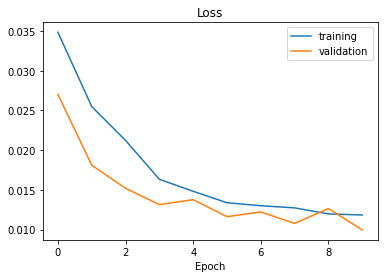

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [33]:
########## SAVING MODEL AND DOWNLOAD TO LOCAL #####
model.save('modelforAngle19041.h5')
from google.colab import files
files.download('modelforAngle19041.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
######################################################
### FOR SPEED PREDICTION

print(data.iloc[13])
def load_speed_img(datadir, df):
  image_path1 = []
  speed1 = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    image_id = indexed_data[0]
    image_path1.append(os.path.join(datadir,image_id))
    #angle.append(float(indexed_data[1]))
    speed1.append((indexed_data[2]))
  image_paths1 = np.asarray(image_path1)
  #angles = np.asarray(angle)
  speeds1= np.asarray(speed1)
  return image_paths1,speeds1

image_id    14.png
angle        0.875
speed            1
Name: 13, dtype: object


In [35]:
image_paths1,speeds1= load_speed_img(datadir + '/training_data/training_data', data)

In [36]:
X_train1,X_valid1,y_train1,y_valid1= train_test_split(image_paths1,speeds1,test_size=0.2,random_state=3)
image_paths1

array(['cardata/training_data/training_data/1.png',
       'cardata/training_data/training_data/2.png',
       'cardata/training_data/training_data/3.png', ...,
       'cardata/training_data/training_data/13796.png',
       'cardata/training_data/training_data/13797.png',
       'cardata/training_data/training_data/13798.png'], dtype='<U45')

Text(0.5, 1.0, 'Validation Image')

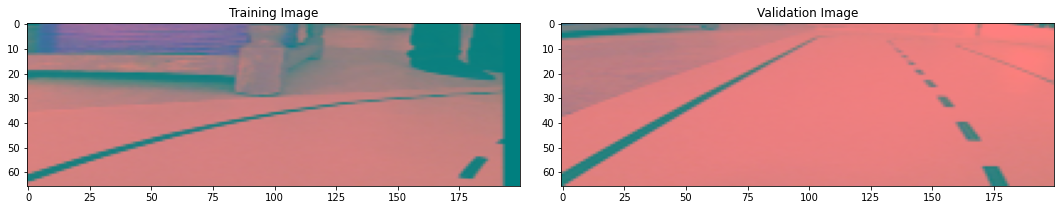

In [37]:
x_train1_gen, y_train1_gen = next(batch_generator(X_train1,y_train1, 1, 1))
x_valid1_gen, y_valid1_gen = next(batch_generator(X_valid1, y_valid1, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [38]:
history1 = model.fit_generator(batch_generator(X_train1, y_train1, 32, 1),
                                  steps_per_epoch=300,
                                  epochs=10,
                                  validation_data=batch_generator(X_valid1, y_valid1, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
300/300 [==============================] - 235s 783ms/step - loss: 0.1881 - val_loss: 0.1412
Epoch 2/10
300/300 [==============================] - 231s 771ms/step - loss: 0.1611 - val_loss: 0.1198
Epoch 3/10
300/300 [==============================] - 230s 769ms/step - loss: 0.1533 - val_loss: 0.1166
Epoch 4/10
300/300 [==============================] - 230s 768ms/step - loss: 0.1405 - val_loss: 0.1049
Epoch 5/10
300/300 [==============================] - 229s 766ms/step - loss: 0.1366 - val_loss: 0.1074
Epoch 6/10
300/300 [==============================] - 227s 761ms/step - loss: 0.1300 - val_loss: 0.0954
Epoch 7/10
300/300 [==============================] - 231s 771ms/step - loss: 0.1239 - val_loss: 0.0869
Epoch 8/10
300/300 [==============================] - 223s 745ms/step - loss: 0.1152 - val_loss: 0.0814
Epoch 9/10
300/300 [==============================] - 232s 776ms/step - loss: 0.1124 - val_loss: 0.0861
Epoch 10/10
300/300 [==============================] - 227s 760m

Text(0.5, 0, 'Epoch')

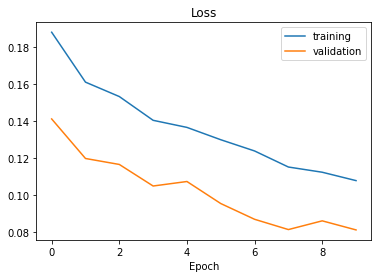

In [39]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [40]:
########## SAVING MODEL AND DOWNLOAD TO LOCAL #####
model.save('modelforSpeed1904.h5')
from google.colab import files
files.download('modelforSpeed1904.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:
# Mount my Google Drive.  It will ask for an authenticate code
### BEFORE THIS DONT FORGET TO UPLOAD MODEL FILE TO DRIVE
from google.colab import drive
drive.mount('/content/gdrive')
model_output_dir = '/content/gdrive/My Drive/Colab Notebooks'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
##############FOR REAL TEST DATA################
###############################################
#################################################
colums= ['image_id1','angle1','speed1']
data1=pd.read_csv(os.path.join(datadir,'Test.csv'))
data1.head()

image_id  angle  speed
0    1.png    NaN    NaN
1    2.png    NaN    NaN
2    3.png    NaN    NaN
3    4.png    NaN    NaN
4    5.png    NaN    NaN

In [46]:
from keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
modelSpeed = load_model(f'{model_output_dir}/modelforSpeed1904.h5')

In [47]:
from keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
modelAngle = load_model(f'{model_output_dir}/modelforAngle19041.h5')


In [48]:
print(data.iloc[13])
def load_test_img(datadir, df):
  test_path = []
  
  for i in range(len(data1)):
    indexed_data = data1.iloc[i]
    image_id = indexed_data[0]
    test_path.append(os.path.join(datadir,image_id))
    test_paths = np.asarray(test_path)
 
  return test_paths

test_paths= load_test_img(datadir + '/test_data/test_data', data1)

image_id    14.png
angle        0.875
speed            1
Name: 13, dtype: object


In [57]:
test_paths

array(['cardata/test_data/test_data/1.png',
       'cardata/test_data/test_data/2.png',
       'cardata/test_data/test_data/3.png', ...,
       'cardata/test_data/test_data/1018.png',
       'cardata/test_data/test_data/1019.png',
       'cardata/test_data/test_data/1020.png'], dtype='<U36')

In [145]:
def batch_generator_TEST(test_paths,NumberOfTestData):

  while True:
    batch_img = []
    
    for i in range(NumberOfTestData):
      im = mpimg.imread(test_paths[i])
      im = img_preprocess(im)
      batch_img.append(im)
          
    yield (np.asarray(batch_img))

In [146]:
random_index =(0, len(test_paths) - 1)
random_index

(0, 1019)

In [147]:
x_TEST_gen= next(batch_generator_TEST(test_paths,1020))
x_TEST_gen.shape

(1020, 66, 200, 3)

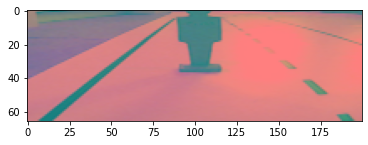

'cardata/test_data/test_data/1.png'

In [154]:
imgplot = plt.imshow(x_TEST_gen[0])
plt.show()
axs[0].set_title('Test Image')
test_paths[0]

In [124]:
Speed_Pred = modelSpeed.predict(x_TEST_gen)
Angle_Pred = modelAngle.predict(x_TEST_gen)

In [125]:
Angle_Pred

array([[0.57743096],
       [0.7838945 ],
       [0.23407659],
       ...,
       [0.45297334],
       [0.5339107 ],
       [0.3717266 ]], dtype=float32)

In [126]:
Speed_Pred

array([[-0.265196  ],
       [ 1.0391004 ],
       [ 0.15809633],
       ...,
       [ 0.65022564],
       [ 0.9301146 ],
       [ 0.11830759]], dtype=float32)

In [127]:
Speed_Pred=np.around(Speed_Pred)

print(Speed_Pred)

[[-0.]
 [ 1.]
 [ 0.]
 ...
 [ 1.]
 [ 1.]
 [ 0.]]


In [85]:
pd.DataFrame(Angle_Pred).to_csv('Angle_Pred1904.csv')

In [86]:
pd.DataFrame(Speed_Pred).to_csv('Speed_Pred1904.csv')

In [95]:
########## PRE-TEST PART ##########################################
#####IN THIS PART WE CAN USE VALIDATION DATA TO PREDICT ############
#################################################################

from keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score

# this function and below function is to see the performance of our model, you can check the images below
def summarize_prediction(Y_true, Y_pred):
    
    mse = mean_squared_error(Y_true, Y_pred)
    r_squared = r2_score(Y_true, Y_pred)
    
    print(f'mse       = {mse:.2}')
    print(f'r_squared = {r_squared:.2%}')
    print()

In [98]:
def predict_and_summarize(X, Y):
    model = load_model(f'{model_output_dir}/modelforAngle19041.h5')
    Y_pred = model.predict(X)
    summarize_prediction(Y, Y_pred)
    return Y_pred

In [ ]:
#I've used X_valid and y_valid to work this function and produce y_pred. Then below we can see predicted and actual angles.
# when we need to submit results to kaggle we need to use TEST_DATA....
y_pred = predict_and_summarize(x_valid1_gen, y_valid1_gen)
y_pred=np.around(y_pred) # for speed